# 1. 데이터 분석

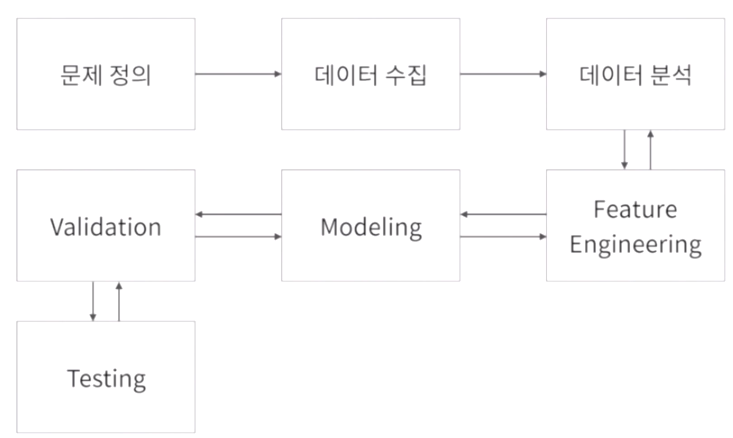

In [ ]:
from elice_utils import EliceUtils
import pandas as pd

elice_utils = EliceUtils()

def main():
    # data 디렉토리에 있는 train.csv 파일을 읽어봅시다.
    # format함수 안에 데이터를 채워주세요. 
    # ex) format(train_data.shape) 
    train_data = pd.read_csv("data/train.csv")
    print("데이터 shape \n {}".format(train_data.shape))
    print("데이터 5개 미리보기 \n {}".format(train_data.head(5)))
    print("데이터 정보 \n {}".format(train_data.info))
    print("null값을 가지고 있는 데이터 \n {}".format(train_data.isnull().sum()))


if __name__ == "__main__":
    main()


In [ ]:
from elice_utils import EliceUtils
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import seaborn as sns
import pandas as pd
import warnings

elice_utils = EliceUtils()

def main():
    # data 를 불러옵시다. 데이터는 data 디렉토리안에 있습니다.
    train_data = pd.read_csv('data/train.csv')
    
    # missingno 라이브러리를 이용해서 null 데이터를 시각화해봅시다.
    # 실제 msno.matrix(train_data, figsize=(12,6)) 같은 역할 의 코드
    matrix(train_data, figsize=(12,12))



# missing 라이브러리의 그래프를 출력하기 위해 직접 missingno의 matrix 함수를 수정해서 사용.
def matrix(df,
           filter=None, n=0, p=0, sort=None,
           figsize=(25, 10), width_ratios=(15, 1), color=(0.25, 0.25, 0.25),
           fontsize=16, labels=None, sparkline=True, inline=False,
           freq=None):
    """
    missingno의 matrix 함수는 주어진 Datafrom의 Null 데이터를 매트릭스 형태로 시각화하는 동작을 합니다.
    최적의 성능을 위해 250행과 50열을 넘지 않도록 유의해주세요. 
    인자로 전달되는 각 파라미터들은 다음의 기능들을 수행합니다.
    df: mapping될 DataFrame 객체.
    filter: 히트 맵에 적용 할 필터입니다. "top", "bottom", None 중 하나의 값을 사용합니다. 기본값은 None입니다.
    n: 필터할 DataFrame에 포함 할 최대 열(columns) 수입니다.
    p: 필터할 DataFrame에서 열(columns)의 최대 채우기 비율입니다.
    sort: 히트 맵에 적용 할 정렬입니다. "오름차순(ascending)", "내림차순(descending)", None 중 하나의 값을 사용합니다. 기본값은 None입니다.
    figsize: 보여줄 할 이미지의 크기입니다.
    fontsize: 글꼴 크기. 기본값은 16입니다.
    labels: 열 이름을 표시할지 여부를 정하는 값입니다. 50개 이하의 열이있는 경우 기본 데이터 레이블로, 50개 이상인 경우에는 레이블이 없습니다.
    sparkline: 스파크 라인을 표시할지 여부를 결정하는 값입니다. 기본값은 True입니다.
    width_ratios: 매트릭스의 폭과 sparkline의 폭의 비율을 설정합니다. 기본값은 `(15, 1)` 입니다. 만약 `sparkline=False`일 경우에는 아무것도 하지 않습니다.
    color: 열(columns)의 색을 정합니다. 기본값은 `(0.25, 0.25, 0.25)` 입니다.
    반환값: 만약 `inline`이 False라면, `matplotlib.figure` 객체를 반환합니다. 그렇지 않다면, 아무것도 반환하지 않습니다.
    """
    df = nullity_filter(df, filter=filter, n=n, p=p)
    df = nullity_sort(df, sort=sort)

    height = df.shape[0]
    width = df.shape[1]

    # z는 컬러 마스크 배열, g는 NxNx3 매트릭스입니다. z색 마스크를 적용하여 각 픽셀의 RGB를 설정합니다.
    z = df.notnull().values
    g = np.zeros((height, width, 3))

    g[z < 0.5] = [1, 1, 1]
    g[z > 0.5] = color

    # matplotlib 그리드 레이아웃을 설정합니다.
    fig = plt.figure(figsize=figsize)
    if sparkline:
        gs = gridspec.GridSpec(1, 2, width_ratios=width_ratios)
        gs.update(wspace=0.08)
        ax1 = plt.subplot(gs[1])
    else:
        gs = gridspec.GridSpec(1, 1)
    ax0 = plt.subplot(gs[0])

    # nullity plot을 생성합니다.
    ax0.imshow(g, interpolation='none')

    # 관계없는 시각적 요소들은 제거합니다.
    ax0.set_aspect('auto')
    ax0.grid(b=False)
    ax0.xaxis.tick_top()
    ax0.xaxis.set_ticks_position('none')
    ax0.yaxis.set_ticks_position('none')
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.spines['left'].set_visible(False)

    # column을 설정하고 회전합니다. labels은 기본적으로 없음으로 설정합니다. 
    # 그렇지 않다면 <= 50 열에 대해서는 표시하고 >50에 대해서는 표시하지 않습니다.
    if labels or (labels is None and len(df.columns) <= 50):
        ha = 'left'
        ax0.set_xticks(list(range(0, width)))
        ax0.set_xticklabels(list(df.columns), rotation=45, ha=ha, fontsize=fontsize)
    else:
        ax0.set_xticks([])
    
    #f req가 None이 아니면 Timestamps를 추가하고 그렇지 않으면 두 개의 맨 아래 행에 값을 설정합니다.
    if freq:
        ts_list = []

        if type(df.index) == pd.PeriodIndex:
            ts_array = pd.date_range(df.index.to_timestamp().date[0],
                                     df.index.to_timestamp().date[-1],
                                     freq=freq).values

            ts_ticks = pd.date_range(df.index.to_timestamp().date[0],
                                     df.index.to_timestamp().date[-1],
                                     freq=freq).map(lambda t:
                                                    t.strftime('%Y-%m-%d'))

        elif type(df.index) == pd.DatetimeIndex:
            ts_array = pd.date_range(df.index.date[0], df.index.date[-1],
                                     freq=freq).values

            ts_ticks = pd.date_range(df.index.date[0], df.index.date[-1],
                                     freq=freq).map(lambda t:
                                                    t.strftime('%Y-%m-%d'))
        else:
            raise KeyError('Dataframe index must be PeriodIndex or DatetimeIndex.')
        try:
            for value in ts_array:
                ts_list.append(df.index.get_loc(value))
        except KeyError:
            raise KeyError('Could not divide time index into desired frequency.')

        ax0.set_yticks(ts_list)
        ax0.set_yticklabels(ts_ticks, fontsize=20, rotation=0)
    else:
        ax0.set_yticks([0, df.shape[0] - 1])
        ax0.set_yticklabels([1, df.shape[0]], fontsize=20, rotation=0)

    # 컬럼 간격 간의 vertical grid를 생성합니다.
    in_between_point = [x + 0.5 for x in range(0, width - 1)]
    for in_between_point in in_between_point:
        ax0.axvline(in_between_point, linestyle='-', color='white')

    if sparkline:
        # 스파크 라인에 대한 row-wise completeness를 계산합니다.
        completeness_srs = df.notnull().astype(bool).sum(axis=1)
        x_domain = list(range(0, height))
        y_range = list(reversed(completeness_srs.values))
        min_completeness = min(y_range)
        max_completeness = max(y_range)
        min_completeness_index = y_range.index(min_completeness)
        max_completeness_index = y_range.index(max_completeness)

        # 스파크 라인을 설정하고 가장자리의 요소를 제거합니다.
        ax1.grid(b=False)
        ax1.set_aspect('auto')
        # GH 25
        if int(mpl.__version__[0]) <= 1:
            ax1.set_axis_bgcolor((1, 1, 1))
        else:
            ax1.set_facecolor((1, 1, 1))
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.set_ymargin(0)
        
        # plot sparkline---plot이 옆으로 있으므로 x 축과 y 축이 반전됩니다.
        ax1.plot(y_range, x_domain, color=color)

        if labels:
            # 아래의 코드는 label을 표시할 때 mixed, upper, lower중 어떠한 case를 사용하는지 찾아냅니다. 
            label = 'Data Completeness'
            if str(df.columns[0]).islower():
                label = label.lower()
            if str(df.columns[0]).isupper():
                label = label.upper()

            # 스파크 라인 lable을 설정하고 회전합니다.
            ha = 'left'
            ax1.set_xticks([min_completeness + (max_completeness - min_completeness) / 2])
            ax1.set_xticklabels([label], rotation=45, ha=ha, fontsize=fontsize)
            ax1.xaxis.tick_top()
            ax1.set_yticks([])
        else:
            ax1.set_xticks([])
            ax1.set_yticks([])

        # 최대 혹은 최소 labels를 추가합니다.
        ax1.annotate(max_completeness,
                     xy=(max_completeness, max_completeness_index),
                     xytext=(max_completeness + 2, max_completeness_index),
                     fontsize=14,
                     va='center',
                     ha='left')
        ax1.annotate(min_completeness,
                     xy=(min_completeness, min_completeness_index),
                     xytext=(min_completeness - 2, min_completeness_index),
                     fontsize=14,
                     va='center',
                     ha='right')

        ax1.set_xlim([min_completeness - 2, max_completeness + 2])  # Otherwise the circles are cut off.
        ax1.plot([min_completeness], [min_completeness_index], '.', color=color, markersize=10.0)
        ax1.plot([max_completeness], [max_completeness_index], '.', color=color, markersize=10.0)

        # tick mark를 제거합니다 (only works after plotting).
        ax1.xaxis.set_ticks_position('none')
        plt.savefig("image.svg", format="svg")
        elice_utils.send_image("image.svg")
    if inline:
        plt.show()
    else:
        return ax0
def nullity_sort(df, sort=None):
    """
    DataFrame의 퇴화차수(nullity)에 따라 오름차순 혹은 내림차순 순으로 정렬합니다.
    df : 정렬될 객체 DataFrame
    sort : 정렬할 방법, "ascending"(오름차순), "descending"(내림차순), or None(기본값)
    반환값 : 퇴화차수에 의해 정렬된 DataFrame
    """
    if sort == 'ascending':
        return df.iloc[np.argsort(df.count(axis='columns').values), :]
    elif sort == 'descending':
        return df.iloc[np.flipud(np.argsort(df.count(axis='columns').values)), :]
    else:
        return df


def nullity_filter(df, filter=None, p=0, n=0):
    """
    'top'과 'bottom'의 숫자 및 백분율 값의 조합을 사용하여 nullity에 따라 DataFrame을 필터링합니다. 백분율 및 숫자 임계 값(threshold)을 동시에 지정할 수 있습니다.
    예를 들어 75 % 이상의 완성도를 가진 DataFrame을 얻으려면 5 개 이하의 열을 사용하고, 
    nullity_filter (df, filter = 'top', p = .75, n = 5)를 사용할 수 있습니다.
    df: 정렬될 객체 DataFrame
    filter: DataFrame에 적용될 필터의 방향성. "상위"(top), "하위"(bottom), 혹은 None(기본값). 만약 해당 값을 비우거나 None이라 설정하면 filter는 DataFrame을 그대로 반환합니다.
    p: 완전성(completeness) 비율 한도. 만약 p가 0이 아니라면 필터는 최소 p의 완전성을 가진 열만을 찾아냅니다. 입력은 [0, 1] 범위에 있어야합니다.
    n: 수치 한도. 만약 n이 0이 아니라면 최대 n개의 열이 반환됩니다.
    반환값: nullity-filter가 적용된 `DataFrame`이 반환됩니다.
    """
    if filter == 'top':
        if p:
            df = df.iloc[:, [c >= p for c in df.count(axis='rows').values / len(df)]]
        if n:
            df = df.iloc[:, np.sort(np.argsort(df.count(axis='rows').values)[-n:])]
    elif filter == 'bottom':
        if p:
            df = df.iloc[:, [c <= p for c in df.count(axis='rows').values / len(df)]]
        if n:
            df = df.iloc[:, np.sort(np.argsort(df.count(axis='rows').values)[:n])]
    return df


if __name__ == "__main__":
    main()



# 2.  discrete 시각화

In [ ]:
from elice_utils import EliceUtils
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
elice_utils = EliceUtils()
train= pd.read_csv('data/train.csv')

# 코드를 지우고 직접 다시 작성해보세요!

def main():
    figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
    figure.set_size_inches(18,12)
    bar_chart('Sex', ax1)
    bar_chart('Pclass', ax2)
    bar_chart('SibSp', ax3)
    bar_chart('Parch', ax4)
    bar_chart('Embarked', ax5)
    ax1.set(title="성별 생사정보")
    ax2.set(title="티켓 class")
    ax3.set(title="형제 수")
    ax4.set(title="부모 자식의 수")
    ax5.set(title="승선 장소")
    
    # 에디터에서 출력을 위한 코드 수정 X
    plt.savefig("image.svg", format="svg")
    elice_utils.send_image("image.svg")

def bar_chart(feature, ax):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, ax=ax)

if __name__ == "__main__":
    main()


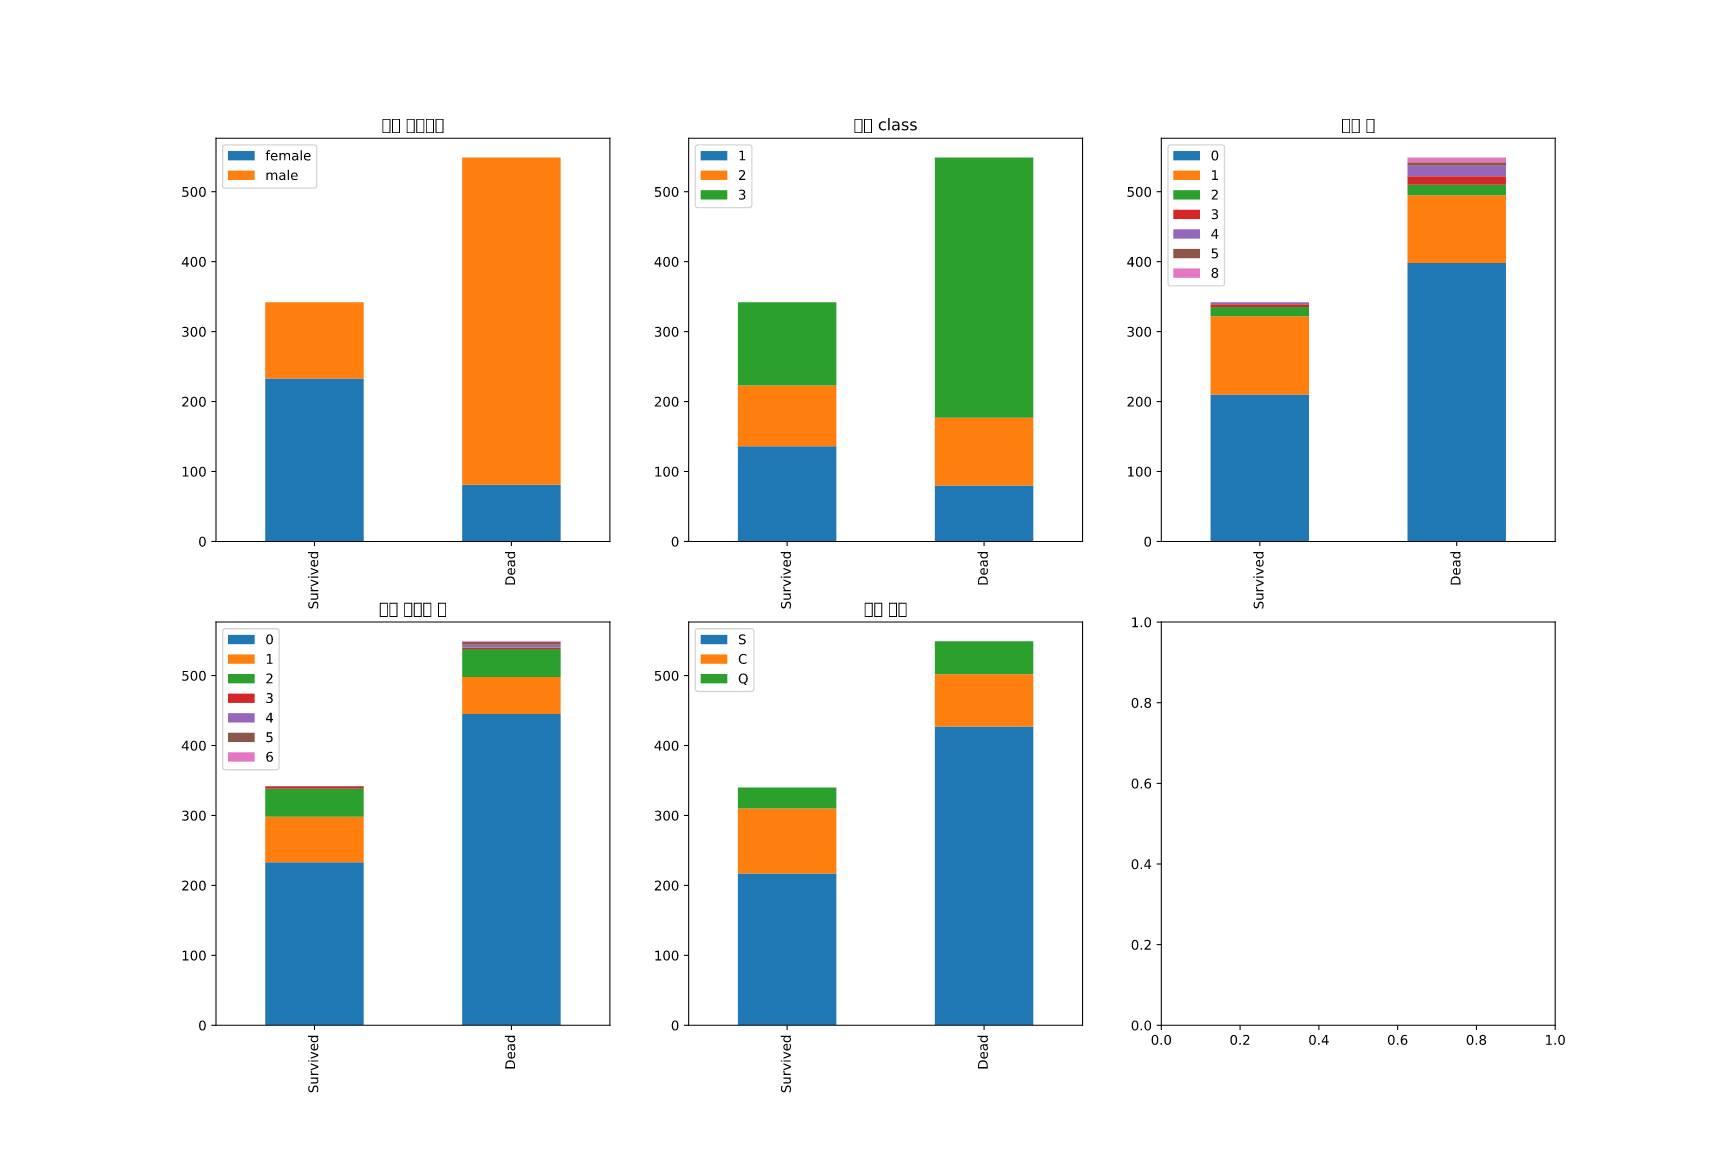

# 3. continuous 데이터 시각화

In [ ]:
from elice_utils import EliceUtils
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
elice_utils = EliceUtils()
train = pd.read_csv('data/train.csv')

def main():
    draw_facetgrid('Age')
    draw_facetgrid('Fare')
    

def draw_facetgrid(feature):
    # train에 저장된 DataFrame을 FacetGrid를 통해 그래프로 그려줍니다. 
    # hue="Survived"는 그래프의 범례(legend)의 이름을 설정합니다.
    # aspect=5 는 그래프의 종횡비를 설정해줍니다.
    facet = sns.FacetGrid(train, hue="Survived", aspect=5)
    
    # facet.map()은 kedplot 방식을 사용하여 주어진 데이터 feature를 plotting 하는 
    # 즉, 그래프를 그리는 기능을 합니다.  
    facet.map(sns.kdeplot, feature, shade=True)
    # 0 부터 값의 주어진 데이터의 최대 값까지를 x축의 범위로 설정합니다.
    facet.set(xlim=(0, train[feature].max()))
    # 지정된 범례(legend)를 표시.
    facet.add_legend() 
    plt.show()    
    
    # 에디터에서 출력을 위한 코드 수정 X
    plt.savefig("image.svg", format="svg")
    elice_utils.send_image("image.svg")

if __name__ == "__main__":
    main()


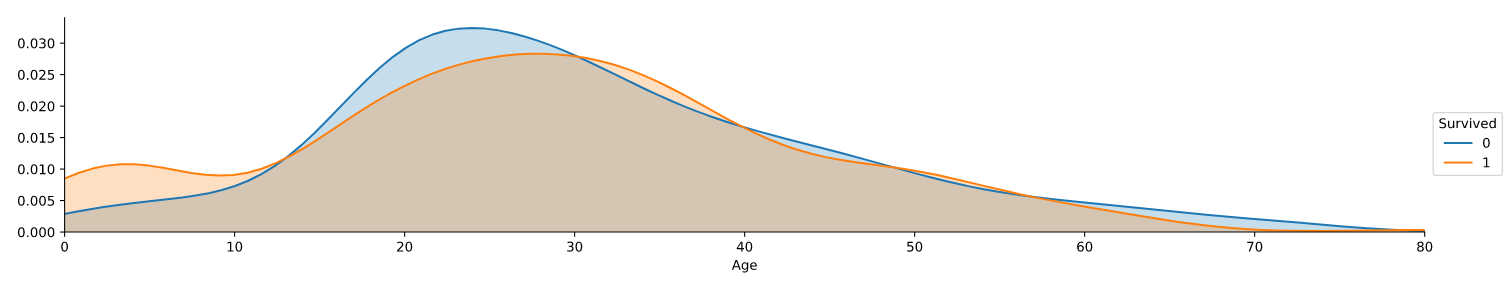

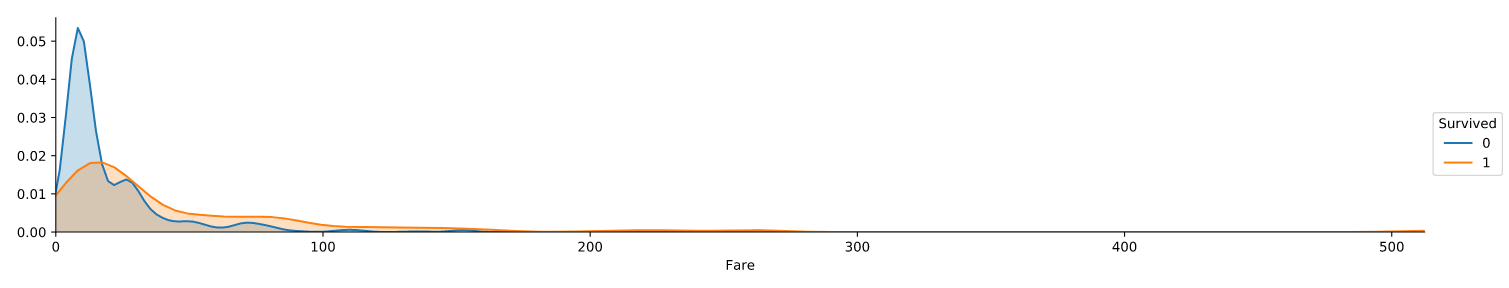

# 타이타닉 pclass 별 시각화

In [ ]:
from elice_utils import EliceUtils
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
elice_utils = EliceUtils()

train = pd.read_csv("data/train.csv")
def main():
    for dataset in [train] :
        dataset['Cabin'] = dataset['Cabin'].str[:1]

    Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
    Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
    Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

    df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
    df.index = ['1st class', '2nd class', '3rd class']
    df.plot(kind='bar', stacked = True, figsize = (10, 10))
    # 에디터에서 출력을 위한 코드 수정 X
    plt.savefig("image.svg", format="svg")
    elice_utils.send_image("image.svg")
    return Pclass1, Pclass2, Pclass3

if __name__ == "__main__":
    main()


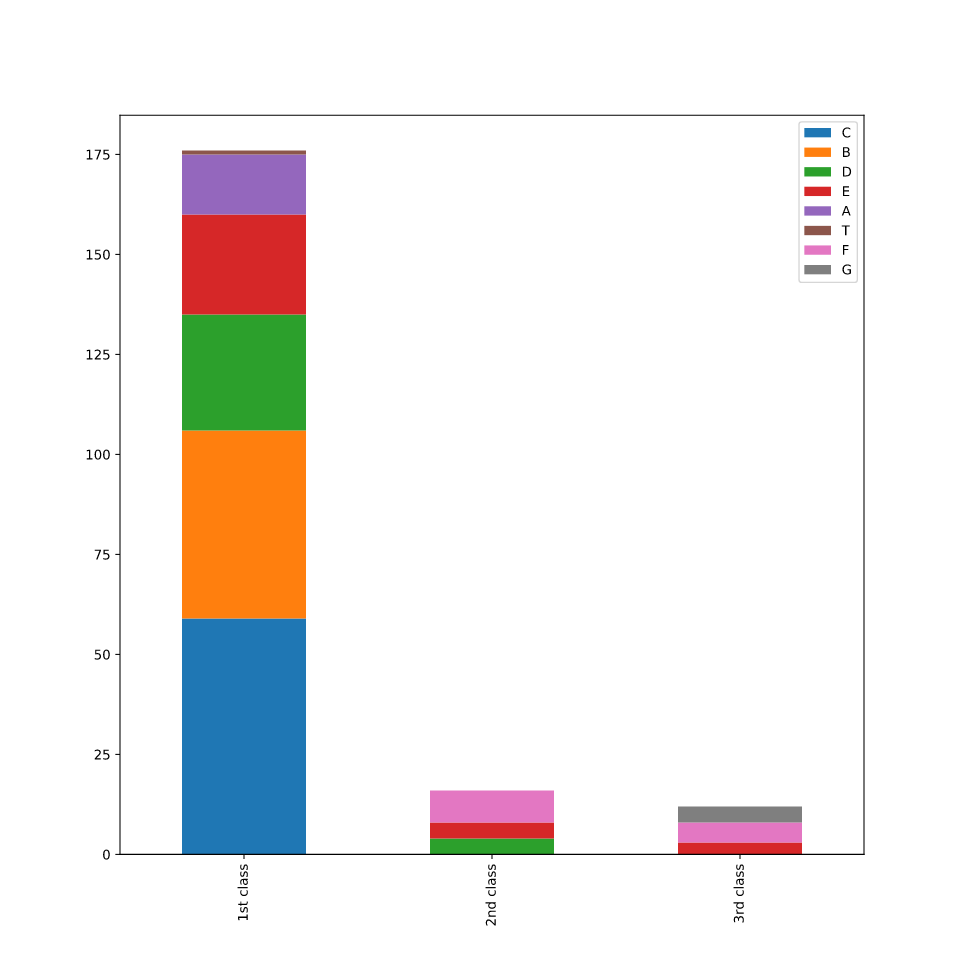

# 5. feature engineering

In [2]:
# 데이터 분석에 필요한 라이브러리들을 import
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc
#import missingno as msno

# os x(mac os) 한글 font 
rc('font', family='AppleGothic')

# 노트북 안에 그래프를 그리기 위해 셋팅
%matplotlib inline

# 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해
mpl.rcParams["axes.unicode_minus"] = False

In [17]:
# data load
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_test = [train, test]

## title

In [18]:
for dataset in train_test :
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [7]:
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [19]:
# 불필요한 column 제거
test.drop('Name', axis = 1, inplace = True)
train.drop('Name', axis = 1, inplace = True)

## title_mapping

In [20]:
title_mapping = {'Mr' : 0, 'Miss' : 1, 'Mrs' : 2,
                'Master' : 0, 'Dr': 3, 'Rev' : 3, 'Col' : 3, 'Major' : 3, 'Mlle' : 3, 'Countess' : 3,
                 'Ms' : 2, 'Lady' : 2, 'Jonkheer' :1, 'Don' : 3, 'Dona' : 3, 'Mme' : 3, 'Capt' :3, 'Sir' : 0}
for dataset in train_test : 
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [21]:
train['Title'].unique()

array([0, 2, 1, 3], dtype=int64)

## 성별

In [53]:
sex_mapping = { 'male' : 0, 'female' :1}
for dataset in train_test :
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [54]:
train['Sex'].unique()

array([0, 1], dtype=int64)

## age

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            2
dtype: int64

In [22]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [25]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand', ascending = True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.328713
2,"(32.252, 48.168]",0.436893
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [27]:
for dataset in train_test : 
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 64, 'Age'] = 0,

In [28]:
train['Age'].unique()

array([1., 2., 3., 0.])

## embarked

In [29]:
for dataset in train_test : 
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [30]:
embarked_mapping = {
    'S' : 0,
    'Q' : 1,
    'C' : 2
}

for dataset in train_test :
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [31]:
train['Embarked'].unique()

array([0, 2, 1], dtype=int64)

## fare

In [32]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

In [33]:
train['FareBand'] = pd.cut(train['Fare'], 5)
train[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by = 'FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 102.466]",0.361575
1,"(102.466, 204.932]",0.757576
2,"(204.932, 307.398]",0.647059
3,"(307.398, 409.863]",NaN
4,"(409.863, 512.329]",1.000000


In [35]:
for dataset in train_test : 
    dataset.loc[dataset['Fare'] <= 102, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 102) & (dataset['Fare'] <= 204), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 204) & (dataset['Fare'] <= 307), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 307, 'Fare'] = 4,

In [36]:
train.drop('AgeBand', axis = 1, inplace=True)
train.drop('FareBand', axis = 1, inplace=True)

## cabin

In [37]:
train.drop('Cabin', axis = 1, inplace=True)
test.drop('Cabin', axis = 1, inplace = True)

## ticket

In [38]:
train.drop('Ticket', axis = 1, inplace=True)
test.drop('Ticket', axis = 1, inplace = True)

## family size

In [56]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

(0, 11.0)

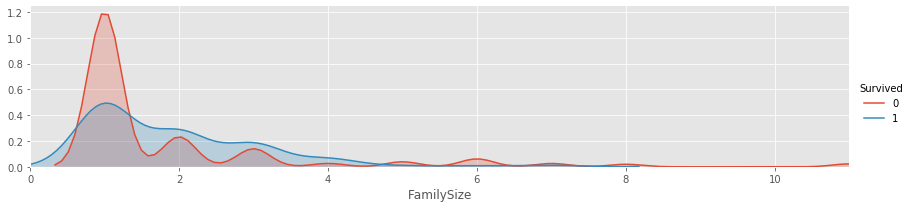

In [57]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim = (0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [58]:
dropped_data = ['Survived', 'PassengerId']
train_data = train.drop(dropped_data, axis = 1)

# 6. modeling

In [45]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 7. cross validation

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
# 여기부터 [실습4, 실습5]의 코드를 입력하세요.

In [59]:
train_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,0,1.0,1,0,0.0,0,0,2
1,1,1,2.0,1,0,0.0,2,2,2
2,3,1,1.0,0,0,0.0,0,1,1
3,1,1,2.0,1,0,0.0,0,2,2
4,3,0,2.0,0,0,0.0,0,0,1


In [60]:
target = train['Survived']
clf = KNeighborsClassifier(n_neighbors=11)
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(round(np.mean(score)* 100, 2))

[0.78888889 0.74157303 0.79775281 0.7752809  0.83146067 0.79775281
 0.7752809  0.7752809  0.83146067 0.82022472]
79.35


In [62]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(round(np.mean(score)* 100, 2))

[0.84444444 0.80898876 0.79775281 0.82022472 0.82022472 0.82022472
 0.78651685 0.80898876 0.75280899 0.78651685]
80.47


In [63]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(round(np.mean(score)* 100, 2))

[0.76666667 0.75280899 0.7752809  0.75280899 0.78651685 0.7752809
 0.7752809  0.79775281 0.82022472 0.79775281]
78.0


In [64]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(round(np.mean(score)* 100, 2))

[0.82222222 0.78651685 0.7752809  0.82022472 0.84269663 0.79775281
 0.79775281 0.79775281 0.82022472 0.84269663]
81.03


In [65]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
print(round(np.mean(score)* 100, 2))

[0.78888889 0.80898876 0.76404494 0.82022472 0.82022472 0.79775281
 0.79775281 0.80898876 0.7752809  0.80898876]
79.91


# 제출

In [66]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop('PassengerId', axis = 1).copy()
prediction = clf.predict(test_data)

In [67]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'],
    'Survived' : prediction
})
submission.to_csv('submission.csv', index=False)